# **Proyecto Data Science: Fundamentos para la Ciencia de Datos**

## **Abstract**

En este proyecto, Focalizaremos el análisis de datos en el rendimiento escolar de diferentes alumnos, analizando el impacto de los diferentes factores que entran en juego al momento de tomar un examen. Además, se buscará entender cuáles de estos contribuyen de manera positiva o negativa en lo que respecta al desempeño final. En cuanto al dataset en sí, este posee información sobre el envolvimiento de los padres, horas de sueño, clases particulares, calidad de profesores, influencia de compañeros, actividades extracurrilares y otras variables que puedan tener cierto efecto en el rendimiento del estudiante.

Por otro lado, se creará y entrenará un modelo predictivo, cuyo objetivo será, a partir de las variables del dataset, poder predecir la calificación de los estudiantes en el examen.


---


**Preguntas**

¿Qué factores son los más influyenes en lo que respecta al rendimiento escolar?

¿Qué tan importantes son para el rendimiento escolar las variables de género, actividad física, distancia del hogar al colegio, actividades extracurriculares e ingreso familiar?


---


**Hipótesis de interés**

Expuestas las preguntas, podemos recurrir entonces la hipótesis, la cual, junto a las preguntas, buscaremos responder a lo largo del análisis:

El rendimiento escolar del estudiante depende en gran medida de factores que se determinan a su alrededor.

## **Análisis Exploratorio**


In [1]:
#Importación de librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from google.colab import files

In [2]:
#Subimos el dataset
dataset = files.upload()


Saving StudentPerformanceFactors.csv to StudentPerformanceFactors.csv


In [3]:
#Renonmbramos nombres de columna a español
nombres = [
    'Horas_Estudio',
    'Asistencia',
    'Envolvimiento_Padres',
    'Acceso_Recursos_Educativos',
    'Actividades_Extracurriculares',
    'Horas_Sueño',
    'Resultado_Anterior',
    'Nivel_Motivación',
    'Acceso_Internet',
    'Sesiones_Tutoría',
    'Ingreso_Familiar',
    'Calidad_Profesor',
    'Tipo_Escuela',
    'Influencia_Compañeros',
    'Actividad_Física',
    'Discapacidades_Aprendizaje',
    'Nivel_Educativo_Padres',
    'Distancia_Hogar_Colegio',
    'Género',
    'Resultado_Examen'
]

In [4]:
#Importo el dataset con los nombres de columnas en español
df = pd.read_csv('StudentPerformanceFactors.csv', names=nombres)
df

,Horas_Estudio,Asistencia,Envolvimiento_Padres,Acceso_Recursos_Educativos,Actividades_Extracurriculares,Horas_Sueño,Resultado_Anterior,Nivel_Motivación,Acceso_Internet,Sesiones_Tutoría,Ingreso_Familiar,Calidad_Profesor,Tipo_Escuela,Influencia_Compañeros,Actividad_Física,Discapacidades_Aprendizaje,Nivel_Educativo_Padres,Distancia_Hogar_Colegio,Género,Resultado_Examen
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2994,14,71,High,High,No,4,77,Medium,Yes,0,Medium,Medium,Public,Negative,3,No,High School,Near,Female,64
2995,20,79,Medium,Medium,Yes,7,72,Low,No,1,Medium,Medium,Public,Negative,3,No,High School,Near,Male,65
2996,22,62,Medium,High,Yes,7,95,Medium,Yes,2,Medium,Medium,Public,Negative,2,No,High School,Near,Male,66
2997,13,93,Low,Medium,No,6,96,High,Yes,2,High,Medium,Private,Negative,3,No,High School,Near,Female,68


In [5]:
#Buscamos valores nulos
df.isnull().sum()

,0
Horas_Estudio,0
Asistencia,0
Envolvimiento_Padres,0
Acceso_Recursos_Educativos,0
Actividades_Extracurriculares,0
Horas_Sueño,0
Resultado_Anterior,0
Nivel_Motivación,0
Acceso_Internet,0
Sesiones_Tutoría,0


In [6]:
#Para poder rellenar los nulos, hacemos value_counts() y encontramos la moda
df.Nivel_Educativo_Padres.value_counts()

,count
Nivel_Educativo_Padres,
High School,1478
College,903
Postgraduate,581


In [7]:
df.Calidad_Profesor.value_counts()

,count
Calidad_Profesor,
Medium,1785
High,870
Low,308


In [8]:
df.Distancia_Hogar_Colegio.value_counts()

,count
Distancia_Hogar_Colegio,
Near,1723
Moderate,917
Far,327


In [9]:
#Rellenamos los nulos con el valor más común (la moda). No es ideal, pero preferible a dejarlo nulo o recurrir al dropna()
df.Calidad_Profesor.fillna('Medium', inplace=True)
df.Nivel_Educativo_Padres.fillna('High School', inplace=True)
df.Distancia_Hogar_Colegio.fillna('Near', inplace=True)

<ipython-input-9-4243e9b8ba09>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Calidad_Profesor.fillna('Medium', inplace=True)
<ipython-input-9-4243e9b8ba09>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

**Visualizaciones**

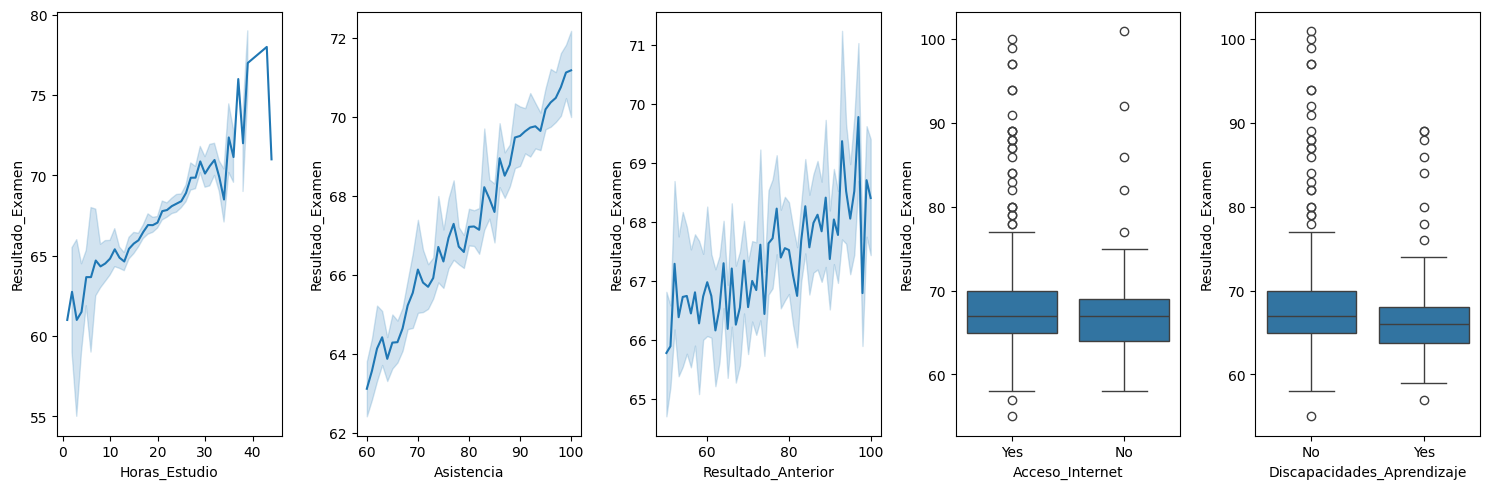

In [10]:
#Ahora, con Seaborn, empezamos a responder la primera pregunta, que busca los factores más influyenes
f, axs = plt.subplots(1, 5, figsize=(15, 5))
sns.lineplot(data=df, x='Horas_Estudio', y='Resultado_Examen', ax=axs[0])
sns.lineplot(data=df, x='Asistencia', y='Resultado_Examen', ax=axs[1])
sns.lineplot(data=df, x='Resultado_Anterior', y='Resultado_Examen', ax=axs[2])
sns.boxplot(data=df, x='Acceso_Internet', y='Resultado_Examen', ax=axs[3])
sns.boxplot(data=df, x='Discapacidades_Aprendizaje', y='Resultado_Examen', ax=axs[4])

f.tight_layout()
plt.show()

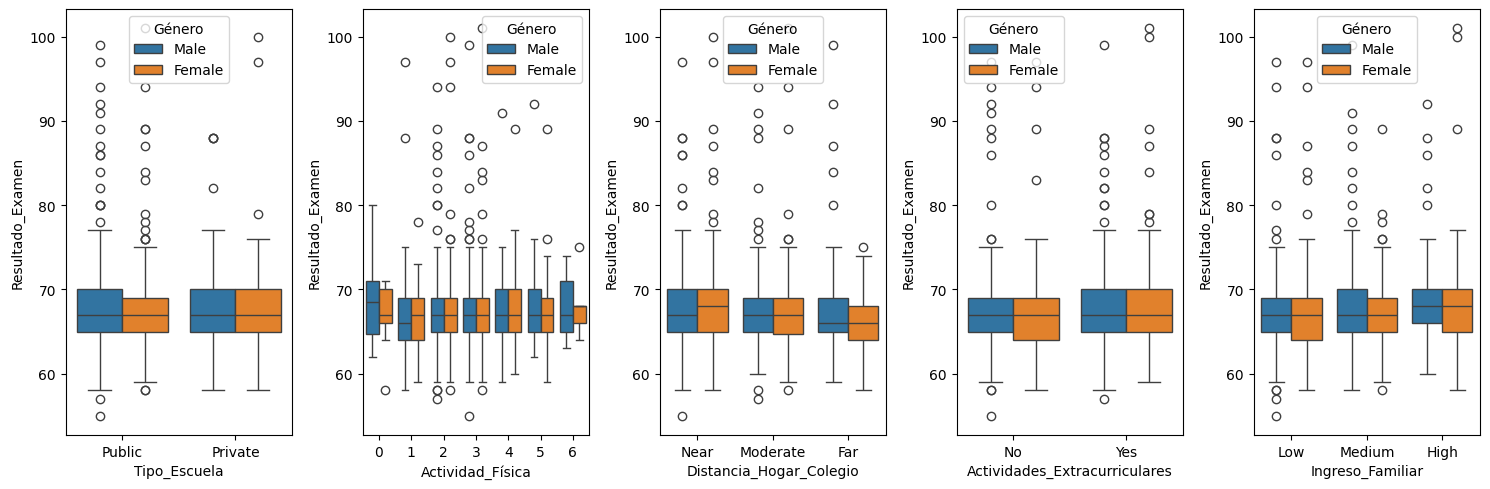

In [ ]:
#Pasamos entonces a responder la pregunta 2, sobre si la actividad física, distancia al colegio y tipo de escuela realmente tienen impacto.
f, axs = plt.subplots(1, 5, figsize=(15, 5))
sns.boxplot(data=df, x='Tipo_Escuela', y='Resultado_Examen', hue='Género', ax=axs[0])
sns.boxplot(data=df, x='Actividad_Física', y='Resultado_Examen', hue='Género', ax=axs[1])
sns.boxplot(data=df, x='Distancia_Hogar_Colegio', y='Resultado_Examen', hue='Género', ax=axs[2])
sns.boxplot(data=df, x='Actividades_Extracurriculares', y='Resultado_Examen', hue='Género', ax=axs[3])
sns.boxplot(data=df, x='Ingreso_Familiar', y='Resultado_Examen', hue='Género', ax=axs[4])

f.tight_layout()
plt.show()

In [55]:
#Más allá de las visualizaciones, podemos calcular la correlación de las variables con el Resultado_Examen para entender mejor el efecto de cada variable
df.corrwith(df['Resultado_Examen']).sort_values(ascending=False)

,0
Resultado_Examen,1.000000
Asistencia,0.555061
Horas_Estudio,0.438297
Resultado_Anterior,0.168991
Sesiones_Tutoría,0.159730
Influencia_Compañeros,0.115473
Distancia_Hogar_Colegio,0.069044
Actividades_Extracurriculares,0.060572
Nivel_Educativo_Padres,0.041287
Acceso_Internet,0.031905




---


### **Conclusiones**


---


Tras haber realizado las visualizaciones, podemos llegar a ciertas conclusiones sobre el impacto de ciertos factores sobre el rendimiento en el examen analizado.


---
**Pregunta 1:**
Para responder esta pregunta, se recurrieron a las variables que, en un principio, parecen más determinantes en lo que significa el resultado final. Tras haber realizado las visualizaciones, parece que la respuesta es positiva, pues podemos notar mejores resultados en aquellos estudiantes con mayor cantidad de estudio, mayor asistencia, con acceso a internet, con un buen resultado anterior y sin ninguna discapacidad del aprendizaje. Es decir, las personas que entraban en los espectros positivos de la variable tendían a rendir de mejor manera que aquellos que no.

---

**Pregunta 2:**
Al momento de diseñar esta pregunta, consideré dentro del dataset variables que consideraba las menos probables de mantener una relación con el rendimiento de los estudiantes. Por lo tanto, decidí analizarlas en conjunto y determinar si alguna de ellas posee una relación notable con los resultados del examen. Además, para cada variable se distinguió el rendimiento entre género, y distinguir si había diferencias.
Pasando a los resultados, podemos notar que, en general, las variables no poseen una gran relación con el resultado, siendo la cercanía al colegio la única con una relación tangible. En cuanto a las demás, no parecen seguir ningún patrón remarcable. Por otro lado, no parece haber demasiadas diferencias en cuanto al rendimiento por género de cada variable, siendo la variable de actividad física donde vemos algunas diferencias, aunque no demasiadas.

---

**Resolución Hipótesis:**
Luego de este análisis en profundidad, podemos determinar la hipótesis planteada como correcta, pues hemos visto fuertes relaciones entre algunos de estos factores y el resultado en el examen. Por lo tanto, el desempeño académico no está sujeto simplemente a la inteligencia o capacidad innata del estudiante, sino que, muchos de los factores a su alrededor (aunque no todos), tanto personales, como familiares, como escolares, contribuyen, en mayor o menor medida, a su performance académica.


## **Análisis Predictivo**

Antes de comenzar con el análisis predictivo, es importante aclarar con qué tipo de aprendizaje nos estamos enfrentando y qué método se utilizará para la creación y entrenamiento del modelo. Además, realizaremos una feature selection, es decir, seleccionaremos las variables importantes y dejaremos de lado aquellas que no posean una relación notoria con la variable a definir (La calificación del examen).

**Tipo de aprendizaje y selección de algortimo**

En primer lugar, se puede ver que, en este caso en particular, nos enfrentamos a un problema de aprendizaje supervisado, particularmente de regresión, pues el objetivo a resolver para el modelo predictivo es el resultado de un examen, que consta de un puntaje numérico. Su tarea, entonces, será, a partir de las variables, determinar el resultado del estudiante en su examen.

**Feature selection**

Mediante el resultado de correlación de todas las variables con Resultado_Examen. Se ha decidido dejar de lado aquellas variables que no alcanzan el 0,03 de correlación con el resultado a predecir, puesto que no llegan a presentar ni siquiera una conexión débil. Por lo tanto, las columnas que se han dejado de lado son:

Actividad_Física; Género; Horas_Sueño; Ingreso_Familiar; Tipo_Escuela;  Nivel_Motivación

In [56]:
#Transformamos las variables categóricas en numéricas a traves de get_dummies. Además, dejamos de lado la variable a predecir y aquellas descartadas en el feature selection
df_seleccionado = df.drop(columns=['Resultado_Examen','Actividad_Física','Género','Horas_Sueño','Ingreso_Familiar','Tipo_Escuela','Nivel_Motivación'])
df_encodeado = pd.get_dummies(df_seleccionado, drop_first=True)


In [57]:
#Separamos la columna a predecir del resto del dataset. Además, dejamos de lado las variables sin relaciones tangibles con el Resultado_Examen
X = df_encodeado
Y = df['Resultado_Examen']

In [58]:
#Separamos los datos para testeo y entrenamiento. En este caso, un 30%
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [59]:
#Creamos el modelo predictivo. Como fue aclarado anteriormente, nos enfrentamos a un problema de regresión, por lo tanto, creamos un modelo acorde.
modelo = RandomForestRegressor(random_state=42, n_estimators=100)

In [60]:
#Entrenamos el modelo
modelo.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [61]:
#Realizamos la predicción
predict = modelo.predict(X_test)

In [62]:
#Para saber qué tan preciso es el modelo, recurrimos a las métricas R2, MSE y MAE
mse = mean_squared_error(y_test, predict)
r2 = r2_score(y_test, predict)
mae = mean_absolute_error(y_test, predict)

print(f"MSE: {mse:.2f}")
print(f"R2: {r2:.2f}")
print(f"MAE: {mae:.2f}")

MSE: 5.05
R2: 0.60
MAE: 1.28


### **Conclusiones finales**

Tras el análisis realizado, se pueden denotar ciertos patrones interesantes que, en caso de ser focalizados, pueden mejorar el rendimiento académico de los estudiantes. Por ejemplo, se puede ver que, con diferencia, la asistencia a clase es la variable más importante en lo que se refiere al resultado del examen, mientras que el género, tipo de escuela e ingreso familiar son de los menos influyentes. Esto demuestra que las instituciones de la región estudiada han enfrentado los problemas de discriminación, tanto de género como económica, apropiadamente, pues no hay diferencias significativas en los resultados.

En cuanto al modelo, podemos ver a través de las métricas que puede predecir relativamente bien los resultados de los estudiantes, con un valor de R2 de 0,60 y un MAE de 1,28 puntos, el cual no es muy alto teniendo en cuenta la escala en la que se puntuaban los examenes. Por otro lado, sí que parece un poco susceptible a outliers (valores atípicos), hecho que se puede ver a través del MSE, el cual posee un valor de 5.05.




---


**Formas de mejorar el proyecto**

Inclusión de nuevas variables: Tras el análisis, se pudo ver que la base de datos contenía muchas variables las cuales no poseían relaciones importantes con el resultado a predecir. Por lo tanto, para poder realizar un análisis más rico en un futuro, la inclusión de nuevas variables (Como la calidad de la institución) puede mejorar el modelo.

Visualizaciones: Pasando al análisis del proyecto en sí, el añadido de visualizaciones sobre los resultados del modelo predictivo podrían ayudar considerablemente. No solo para entender en mejor medida el funcionamiento del modelo, sino también a comprender más profundamente el dataset y patrones que solo se pueden encontrar a través de este método.